In [1]:
# To get rid of those blocks of red warnings
import warnings
warnings.filterwarnings("ignore")

# Standard Imports
import numpy as np
from scipy import stats
import pandas as pd
from math import sqrt
import os
from sklearn.cluster import KMeans
import requests
import json
import time
from scipy.stats import spearmanr

# Vis Imports
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
from pandas.plotting import register_matplotlib_converters


# Modeling Imports
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from sklearn.feature_selection import f_regression 
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import SelectKBest, f_regression, RFE
import statsmodels.api as sm
from statsmodels.tsa.api import Holt

In [2]:
df1=pd.read_csv("GlobalLandTemperaturesByCity.csv")
df2=pd.read_csv("GlobalTemperatures.csv")

In [3]:
df = pd.merge(df1, df2, how="left", on=["dt"])

In [4]:
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.shape

(8599212, 15)

In [6]:
df.isnull().sum()

dt                                                 0
AverageTemperature                            364130
AverageTemperatureUncertainty                 364130
City                                               0
Country                                            0
Latitude                                           0
Longitude                                          0
LandAverageTemperature                         60728
LandAverageTemperatureUncertainty              60728
LandMaxTemperature                           1737451
LandMaxTemperatureUncertainty                1737451
LandMinTemperature                           1737451
LandMinTemperatureUncertainty                1737451
LandAndOceanAverageTemperature               1737451
LandAndOceanAverageTemperatureUncertainty    1737451
dtype: int64

In [7]:
df.dtypes

dt                                            object
AverageTemperature                           float64
AverageTemperatureUncertainty                float64
City                                          object
Country                                       object
Latitude                                      object
Longitude                                     object
LandAverageTemperature                       float64
LandAverageTemperatureUncertainty            float64
LandMaxTemperature                           float64
LandMaxTemperatureUncertainty                float64
LandMinTemperature                           float64
LandMinTemperatureUncertainty                float64
LandAndOceanAverageTemperature               float64
LandAndOceanAverageTemperatureUncertainty    float64
dtype: object

In [8]:
df.loc[(df['City'] == 'Århus')]

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3234,2013-05-01,12.770,0.549,Århus,Denmark,57.05N,10.33E,12.195,0.104,18.107,0.139,6.263,0.196,16.609,0.065
3235,2013-06-01,15.223,0.322,Århus,Denmark,57.05N,10.33E,14.568,0.090,20.440,0.158,8.685,0.165,17.257,0.062
3236,2013-07-01,18.259,0.314,Århus,Denmark,57.05N,10.33E,15.003,0.126,20.737,0.100,9.330,0.153,17.503,0.068
3237,2013-08-01,17.423,0.408,Århus,Denmark,57.05N,10.33E,14.742,0.129,20.596,0.120,9.014,0.179,17.462,0.068


In [9]:
df.dt = pd.to_datetime(df.dt)

In [10]:
df.columns

Index(['dt', 'AverageTemperature', 'AverageTemperatureUncertainty', 'City',
       'Country', 'Latitude', 'Longitude', 'LandAverageTemperature',
       'LandAverageTemperatureUncertainty', 'LandMaxTemperature',
       'LandMaxTemperatureUncertainty', 'LandMinTemperature',
       'LandMinTemperatureUncertainty', 'LandAndOceanAverageTemperature',
       'LandAndOceanAverageTemperatureUncertainty'],
      dtype='object')

In [11]:
df_cols = ['date', 'avg_temp', 'avg_temp_uncertainty', 'city',
       'country', 'lat', 'long', 'land_avg_temp',
       'land_avg_temp_uncertainty', 'land_max_temp',
       'land_max_temp_uncertainty', 'land_min_temp',
       'land_min_temp_uncertainty', 'land_ocean_avg_temp',
       'land_ocean_avg_temp_uncertainty']
df.columns = df_cols

In [12]:
df.columns

Index(['date', 'avg_temp', 'avg_temp_uncertainty', 'city', 'country', 'lat',
       'long', 'land_avg_temp', 'land_avg_temp_uncertainty', 'land_max_temp',
       'land_max_temp_uncertainty', 'land_min_temp',
       'land_min_temp_uncertainty', 'land_ocean_avg_temp',
       'land_ocean_avg_temp_uncertainty'],
      dtype='object')

In [13]:
df = df[(df['date'].dt.year > 1849)]
df = df[(df['date'].dt.year != 2013)]

In [14]:
df.isnull().sum()

date                                    0
avg_temp                           123888
avg_temp_uncertainty               123888
city                                    0
country                                 0
lat                                     0
long                                    0
land_avg_temp                           0
land_avg_temp_uncertainty               0
land_max_temp                           0
land_max_temp_uncertainty               0
land_min_temp                           0
land_min_temp_uncertainty               0
land_ocean_avg_temp                     0
land_ocean_avg_temp_uncertainty         0
dtype: int64

In [15]:
df.loc[(df['city'] == 'Århus')].isnull().sum()

date                               0
avg_temp                           0
avg_temp_uncertainty               0
city                               0
country                            0
lat                                0
long                               0
land_avg_temp                      0
land_avg_temp_uncertainty          0
land_max_temp                      0
land_max_temp_uncertainty          0
land_min_temp                      0
land_min_temp_uncertainty          0
land_ocean_avg_temp                0
land_ocean_avg_temp_uncertainty    0
dtype: int64

In [16]:
df = df.dropna()

In [17]:
df.isnull().sum()

date                               0
avg_temp                           0
avg_temp_uncertainty               0
city                               0
country                            0
lat                                0
long                               0
land_avg_temp                      0
land_avg_temp_uncertainty          0
land_max_temp                      0
land_max_temp_uncertainty          0
land_min_temp                      0
land_min_temp_uncertainty          0
land_ocean_avg_temp                0
land_ocean_avg_temp_uncertainty    0
dtype: int64

In [18]:
df.head()

,date,avg_temp,avg_temp_uncertainty,city,country,lat,long,land_avg_temp,land_avg_temp_uncertainty,land_max_temp,land_max_temp_uncertainty,land_min_temp,land_min_temp_uncertainty,land_ocean_avg_temp,land_ocean_avg_temp_uncertainty
1274,1850-01-01,-5.265,1.820,Århus,Denmark,57.05N,10.33E,0.749,1.105,8.242,1.738,-3.206,2.822,12.833,0.367
1275,1850-02-01,1.859,1.641,Århus,Denmark,57.05N,10.33E,3.071,1.275,9.970,3.007,-2.291,1.623,13.588,0.414
1276,1850-03-01,0.032,3.167,Århus,Denmark,57.05N,10.33E,4.954,0.955,10.347,2.401,-1.905,1.410,14.043,0.341
1277,1850-04-01,5.764,1.903,Århus,Denmark,57.05N,10.33E,7.217,0.665,12.934,1.004,1.018,1.329,14.667,0.267
1278,1850-05-01,11.037,0.586,Århus,Denmark,57.05N,10.33E,10.004,0.617,15.655,2.406,3.811,1.347,15.507,0.249


In [19]:
df = df.set_index('date')

In [20]:
df.head(1)

,avg_temp,avg_temp_uncertainty,city,country,lat,long,land_avg_temp,land_avg_temp_uncertainty,land_max_temp,land_max_temp_uncertainty,land_min_temp,land_min_temp_uncertainty,land_ocean_avg_temp,land_ocean_avg_temp_uncertainty
date,,,,,,,,,,,,,,
1850-01-01,-5.265,1.82,Århus,Denmark,57.05N,10.33E,0.749,1.105,8.242,1.738,-3.206,2.822,12.833,0.367


In [21]:
df['lat'] = df['lat'].map(lambda x: x.rstrip('NESW'))
df['long'] = df['long'].map(lambda x: x.rstrip('NESW'))


In [22]:
df.head(1)


,avg_temp,avg_temp_uncertainty,city,country,lat,long,land_avg_temp,land_avg_temp_uncertainty,land_max_temp,land_max_temp_uncertainty,land_min_temp,land_min_temp_uncertainty,land_ocean_avg_temp,land_ocean_avg_temp_uncertainty
date,,,,,,,,,,,,,,
1850-01-01,-5.265,1.82,Århus,Denmark,57.05,10.33,0.749,1.105,8.242,1.738,-3.206,2.822,12.833,0.367


In [23]:
df['lat'] = df['lat'].astype(float)
df['long'] = df['long'].astype(float)


In [24]:
df.dtypes

avg_temp                           float64
avg_temp_uncertainty               float64
city                                object
country                             object
lat                                float64
long                               float64
land_avg_temp                      float64
land_avg_temp_uncertainty          float64
land_max_temp                      float64
land_max_temp_uncertainty          float64
land_min_temp                      float64
land_min_temp_uncertainty          float64
land_ocean_avg_temp                float64
land_ocean_avg_temp_uncertainty    float64
dtype: object

In [25]:
df = df.loc[(df['country'] == 'United States')]

In [26]:
df = df.loc[(df['city'] == 'Columbus')]

In [27]:
df.head()

,avg_temp,avg_temp_uncertainty,city,country,lat,long,land_avg_temp,land_avg_temp_uncertainty,land_max_temp,land_max_temp_uncertainty,land_min_temp,land_min_temp_uncertainty,land_ocean_avg_temp,land_ocean_avg_temp_uncertainty
date,,,,,,,,,,,,,,
1850-01-01,11.038,2.104,Columbus,United States,32.95,85.21,0.749,1.105,8.242,1.738,-3.206,2.822,12.833,0.367
1850-02-01,8.989,1.998,Columbus,United States,32.95,85.21,3.071,1.275,9.970,3.007,-2.291,1.623,13.588,0.414
1850-03-01,12.504,3.188,Columbus,United States,32.95,85.21,4.954,0.955,10.347,2.401,-1.905,1.410,14.043,0.341
1850-04-01,15.507,2.497,Columbus,United States,32.95,85.21,7.217,0.665,12.934,1.004,1.018,1.329,14.667,0.267
1850-05-01,20.107,1.667,Columbus,United States,32.95,85.21,10.004,0.617,15.655,2.406,3.811,1.347,15.507,0.249


In [28]:
print('Date Range:', df.index.min(), 'to', df.index.max())

Date Range: 1850-01-01 00:00:00 to 2012-12-01 00:00:00


In [29]:
train_size = int(len(df) * .5)
validate_size = int(len(df) * .3)
test_size = int(len(df) - train_size - validate_size)
validate_end_index = train_size + validate_size

# split into train, validation, test
train = df[: train_size]
validate = df[train_size : validate_end_index]
test = df[validate_end_index : ]

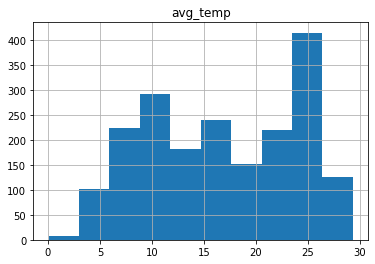

25.240    3
7.107     3
25.405    3
10.473    2
25.824    2
         ..
10.597    1
17.452    1
24.978    1
25.577    1
11.015    1
Name: avg_temp, Length: 1865, dtype: int64
25.240    0.153374
7.107     0.153374
25.405    0.153374
10.473    0.102249
25.824    0.102249
            ...   
10.597    0.051125
17.452    0.051125
24.978    0.051125
25.577    0.051125
11.015    0.051125
Name: avg_temp, Length: 1865, dtype: float64


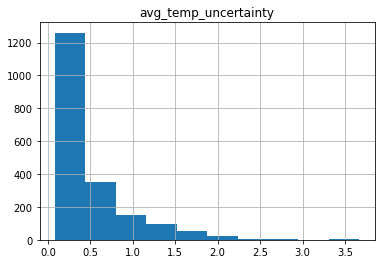

0.267    11
0.221    11
0.285    10
0.268    10
0.263    10
         ..
0.879     1
0.599     1
0.491     1
0.814     1
0.190     1
Name: avg_temp_uncertainty, Length: 829, dtype: int64
0.267    0.562372
0.221    0.562372
0.285    0.511247
0.268    0.511247
0.263    0.511247
           ...   
0.879    0.051125
0.599    0.051125
0.491    0.051125
0.814    0.051125
0.190    0.051125
Name: avg_temp_uncertainty, Length: 829, dtype: float64


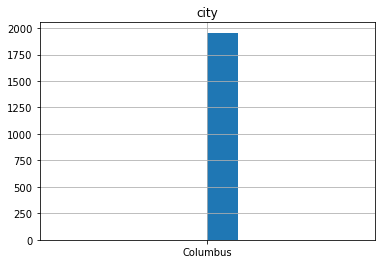

Columbus    1956
Name: city, dtype: int64
Columbus    100.0
Name: city, dtype: float64


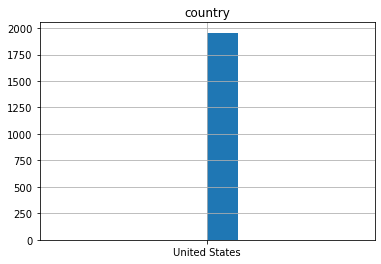

United States    1956
Name: country, dtype: int64
United States    100.0
Name: country, dtype: float64


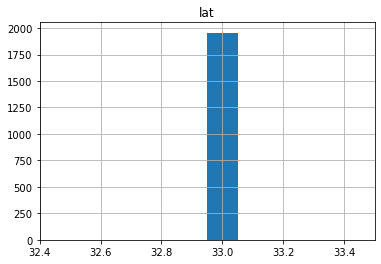

32.95    1956
Name: lat, dtype: int64
32.95    100.0
Name: lat, dtype: float64


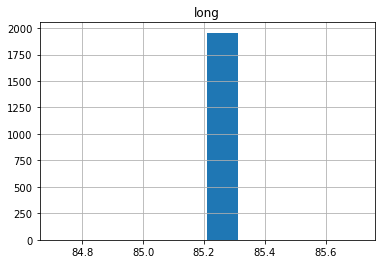

85.21    1956
Name: long, dtype: int64
85.21    100.0
Name: long, dtype: float64


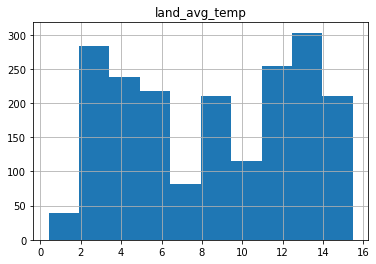

14.242    3
12.247    3
3.785     3
13.459    3
13.765    3
         ..
10.982    1
7.755     1
4.635     1
1.927     1
4.102     1
Name: land_avg_temp, Length: 1802, dtype: int64
14.242    0.153374
12.247    0.153374
3.785     0.153374
13.459    0.153374
13.765    0.153374
            ...   
10.982    0.051125
7.755     0.051125
4.635     0.051125
1.927     0.051125
4.102     0.051125
Name: land_avg_temp, Length: 1802, dtype: float64


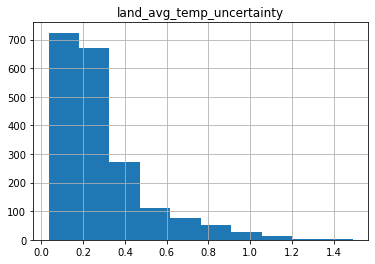

0.087    20
0.064    19
0.077    15
0.078    15
0.082    14
         ..
0.650     1
0.941     1
0.278     1
0.714     1
0.034     1
Name: land_avg_temp_uncertainty, Length: 627, dtype: int64
0.087    1.022495
0.064    0.971370
0.077    0.766871
0.078    0.766871
0.082    0.715746
           ...   
0.650    0.051125
0.941    0.051125
0.278    0.051125
0.714    0.051125
0.034    0.051125
Name: land_avg_temp_uncertainty, Length: 627, dtype: float64


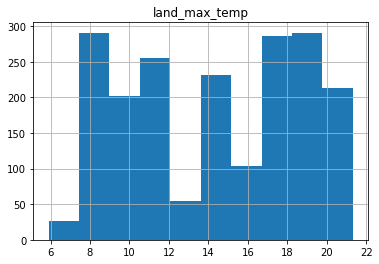

10.781    3
19.753    3
17.289    3
19.987    3
17.196    3
         ..
11.984    1
14.866    1
17.684    1
19.619    1
9.498     1
Name: land_max_temp, Length: 1785, dtype: int64
10.781    0.153374
19.753    0.153374
17.289    0.153374
19.987    0.153374
17.196    0.153374
            ...   
11.984    0.051125
14.866    0.051125
17.684    0.051125
19.619    0.051125
9.498     0.051125
Name: land_max_temp, Length: 1785, dtype: float64


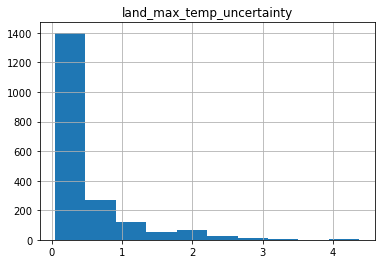

0.093    13
0.105    12
0.130    11
0.094    11
0.099    10
         ..
0.889     1
1.177     1
1.030     1
1.047     1
0.059     1
Name: land_max_temp_uncertainty, Length: 841, dtype: int64
0.093    0.664622
0.105    0.613497
0.130    0.562372
0.094    0.562372
0.099    0.511247
           ...   
0.889    0.051125
1.177    0.051125
1.030    0.051125
1.047    0.051125
0.059    0.051125
Name: land_max_temp_uncertainty, Length: 841, dtype: float64


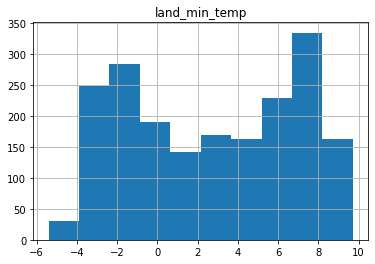

-1.139    3
 7.892    3
 8.184    3
 7.818    3
 8.161    3
         ..
-3.583    1
-3.860    1
-2.687    1
-0.051    1
 4.765    1
Name: land_min_temp, Length: 1839, dtype: int64
-1.139    0.153374
 7.892    0.153374
 8.184    0.153374
 7.818    0.153374
 8.161    0.153374
            ...   
-3.583    0.051125
-3.860    0.051125
-2.687    0.051125
-0.051    0.051125
 4.765    0.051125
Name: land_min_temp, Length: 1839, dtype: float64


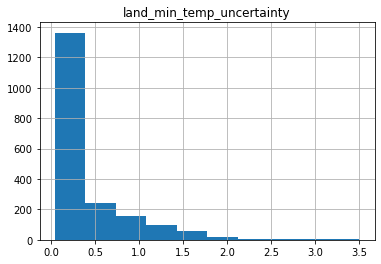

0.237    12
0.145    11
0.082    11
0.130    11
0.213    10
         ..
0.614     1
0.935     1
1.031     1
1.339     1
0.065     1
Name: land_min_temp_uncertainty, Length: 781, dtype: int64
0.237    0.613497
0.145    0.562372
0.082    0.562372
0.130    0.562372
0.213    0.511247
           ...   
0.614    0.051125
0.935    0.051125
1.031    0.051125
1.339    0.051125
0.065    0.051125
Name: land_min_temp_uncertainty, Length: 781, dtype: float64


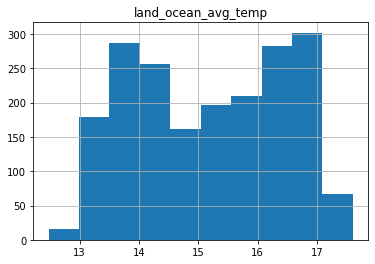

15.005    5
16.596    4
16.496    4
15.927    4
16.783    4
         ..
14.054    1
15.950    1
16.662    1
16.436    1
14.138    1
Name: land_ocean_avg_temp, Length: 1572, dtype: int64
15.005    0.255624
16.596    0.204499
16.496    0.204499
15.927    0.204499
16.783    0.204499
            ...   
14.054    0.051125
15.950    0.051125
16.662    0.051125
16.436    0.051125
14.138    0.051125
Name: land_ocean_avg_temp, Length: 1572, dtype: float64


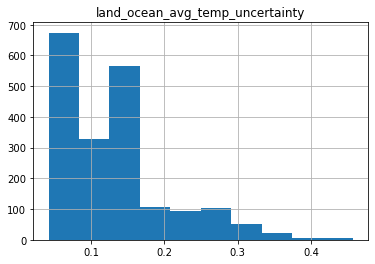

0.061    46
0.060    45
0.059    44
0.057    39
0.062    38
         ..
0.332     1
0.387     1
0.389     1
0.417     1
0.042     1
Name: land_ocean_avg_temp_uncertainty, Length: 294, dtype: int64
0.061    2.351738
0.060    2.300613
0.059    2.249489
0.057    1.993865
0.062    1.942740
           ...   
0.332    0.051125
0.387    0.051125
0.389    0.051125
0.417    0.051125
0.042    0.051125
Name: land_ocean_avg_temp_uncertainty, Length: 294, dtype: float64


In [30]:
for col in train.columns:
    train[col].hist().plot()
    plt.title(col)
    plt.show()
    print(train[col].value_counts())
    print(train[col].value_counts(normalize=True)*100)

In [31]:
# fig = px.scatter_mapbox(train, lat="lat", lon="long", hover_name="city", hover_data=["country"],
#                         color_discrete_sequence=["blue"], color="avg_temp", zoom=2, height=700)
# fig.update_layout(mapbox_style="open-street-map")
# fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
# fig.show()

In [32]:
y = train.avg_temp

<AxesSubplot:xlabel='date'>

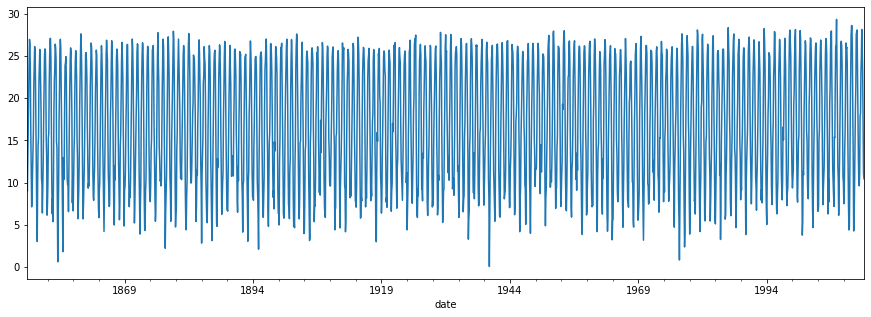

In [33]:
y.plot(figsize=(15,5))

<AxesSubplot:title={'center':'1 Year average'}, xlabel='date'>

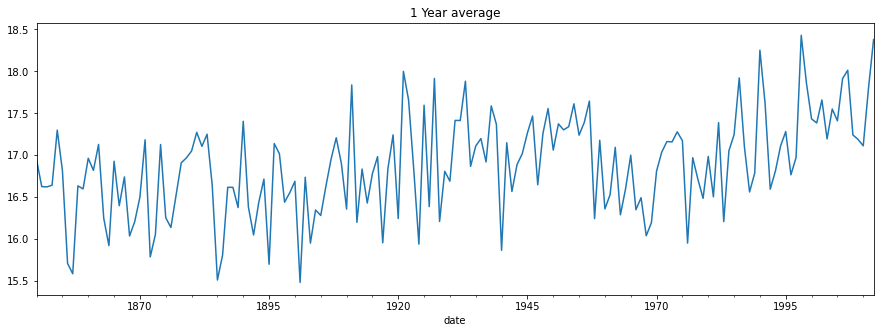

In [34]:
y.resample('1Y').mean().plot(title='1 Year average', figsize=(15,5))


<AxesSubplot:title={'center':'Seasonal Plot'}, xlabel='date'>

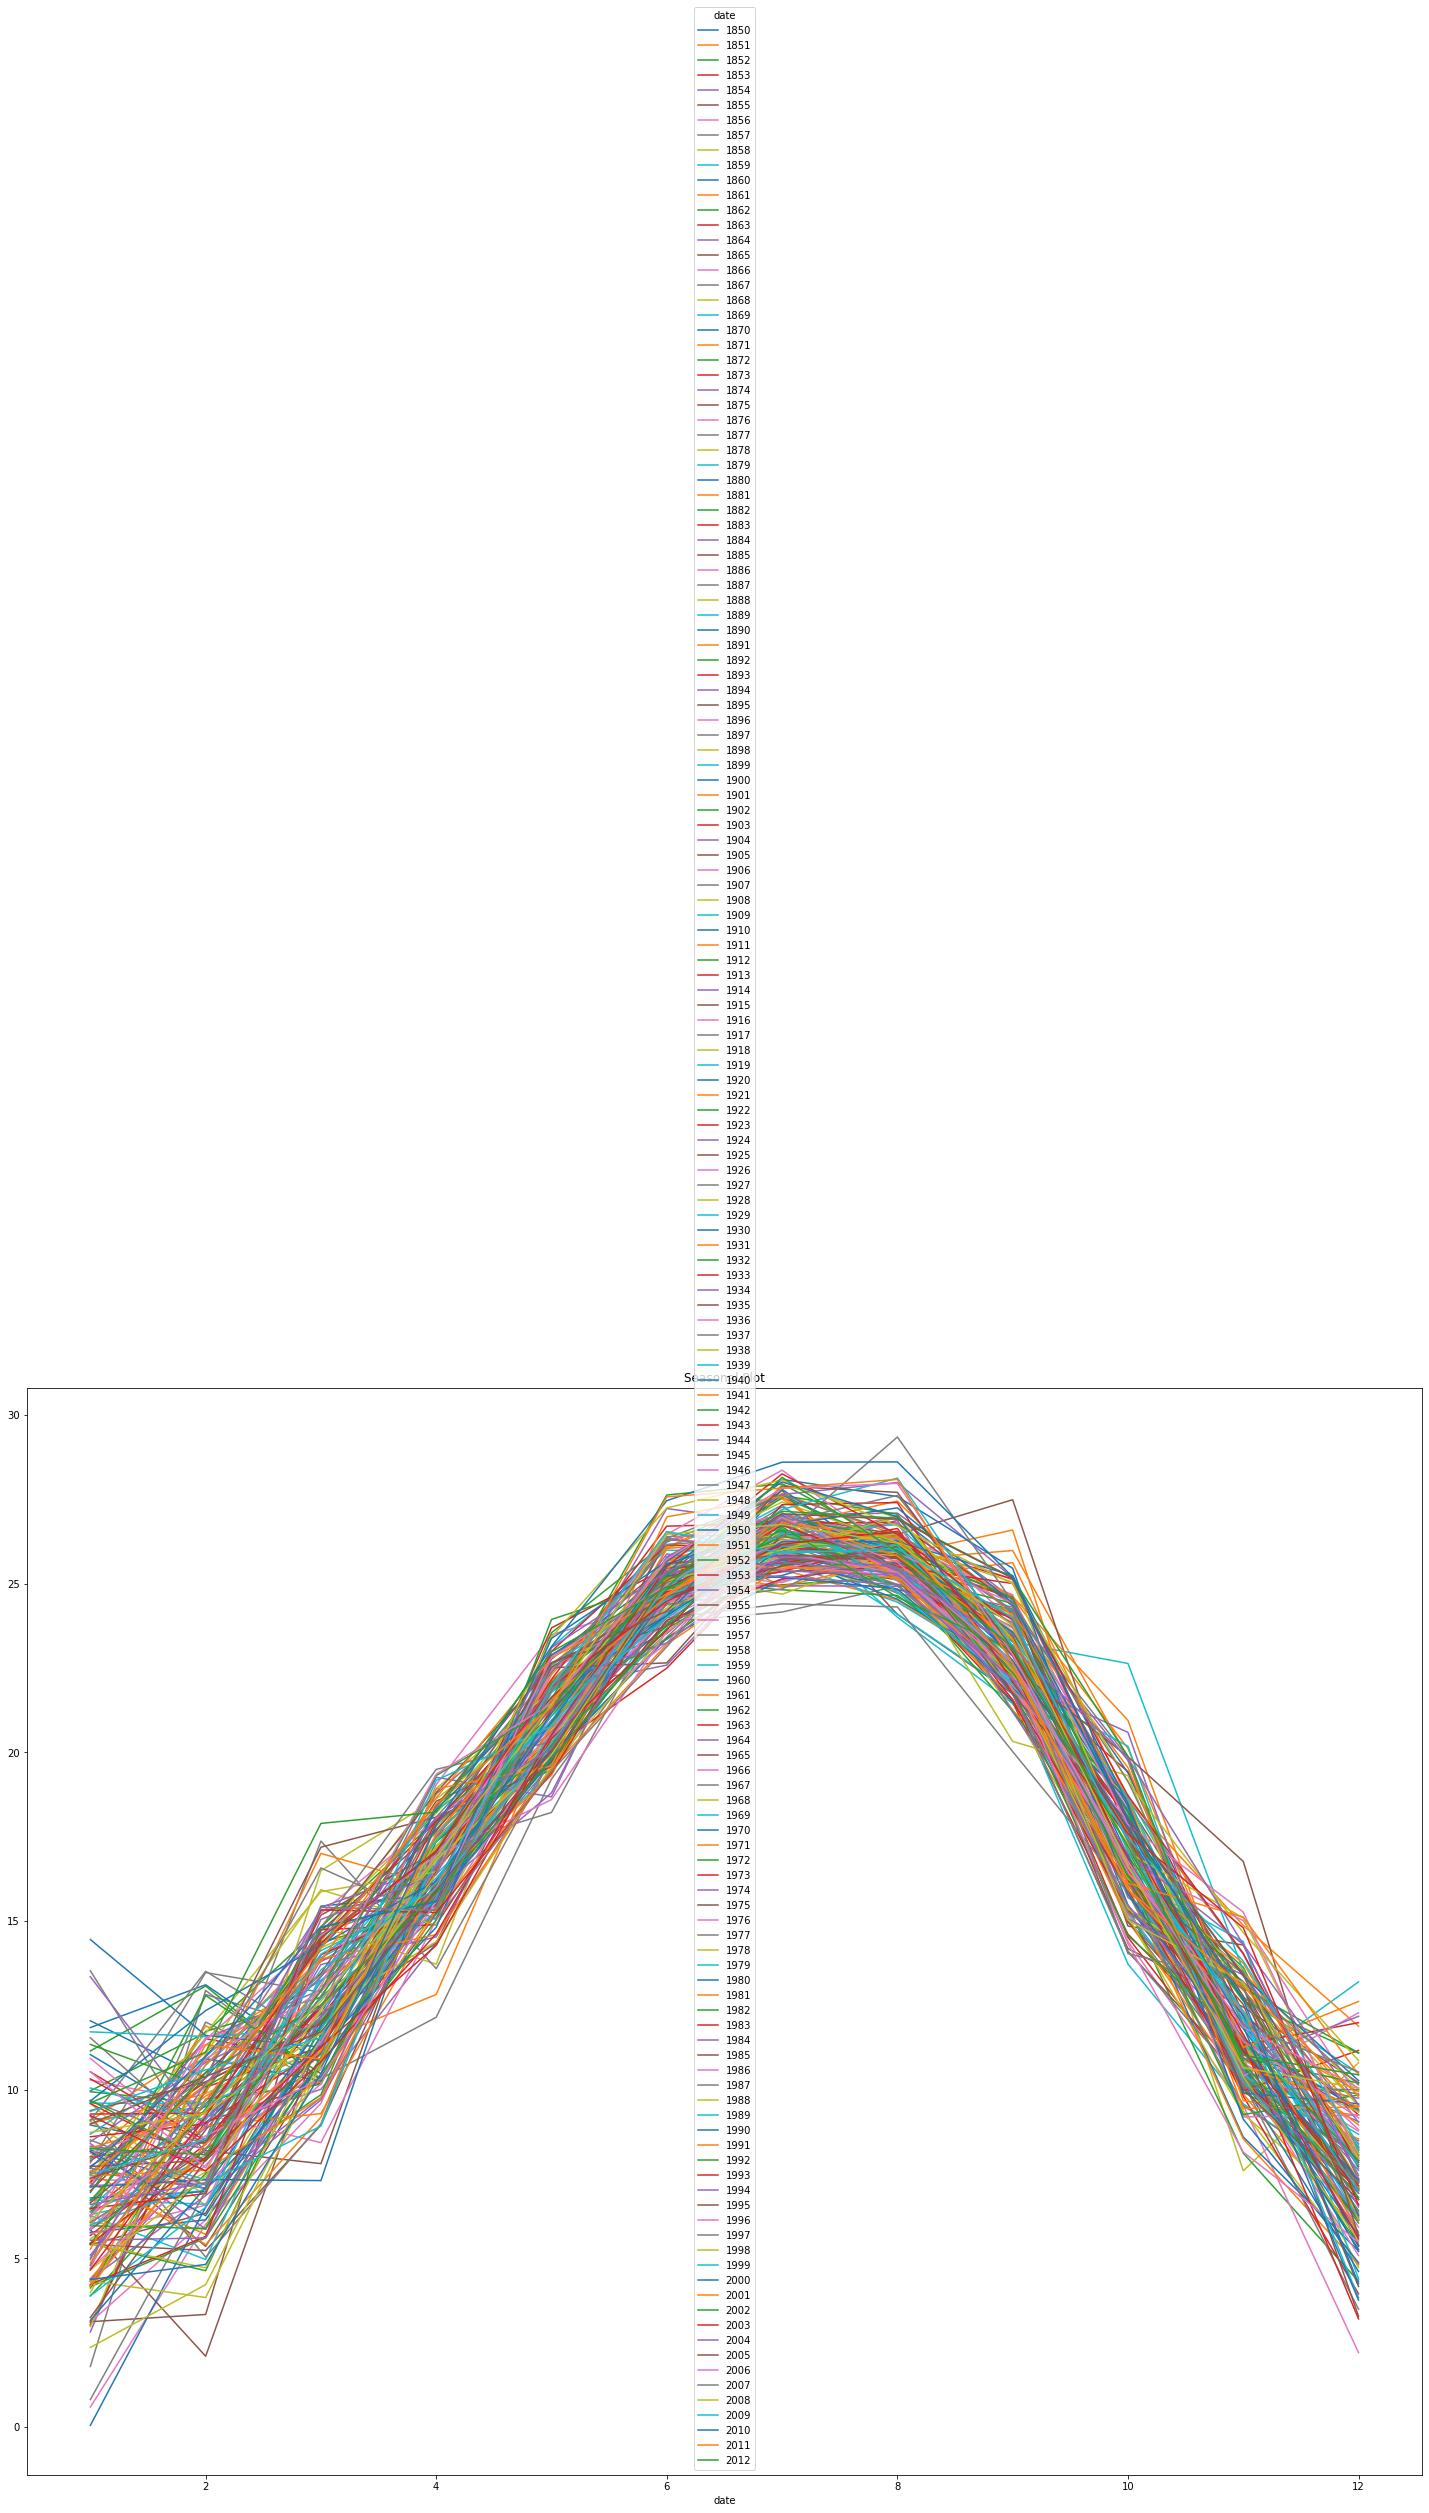

In [35]:
y.groupby([y.index.year, y.index.month]).mean().unstack(0).plot(title='Seasonal Plot', figsize=(25, 20))

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

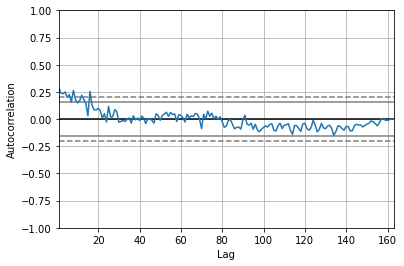

In [36]:
pd.plotting.autocorrelation_plot(train.avg_temp.resample('Y').mean())


In [37]:
result = sm.tsa.seasonal_decompose(y)
decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid,
})
decomposition.head()

,y,trend,seasonal,resid
date,,,,
1850-01-01,11.038,NaN,-9.961738,NaN
1850-02-01,8.989,NaN,-8.171789,NaN
1850-03-01,12.504,NaN,-4.388868,NaN
1850-04-01,15.507,NaN,-0.271439,NaN
1850-05-01,20.107,NaN,4.260452,NaN


<AxesSubplot:xlabel='date'>

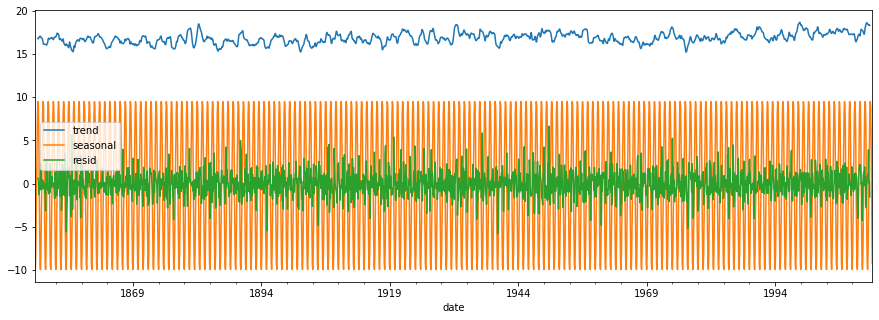

In [38]:
decomposition.iloc[:, 1:].plot(figsize=(15,5))


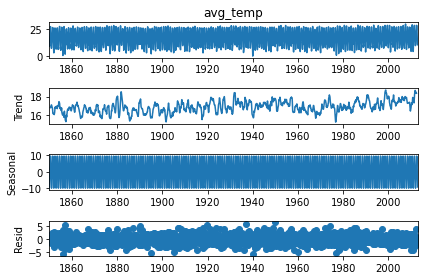

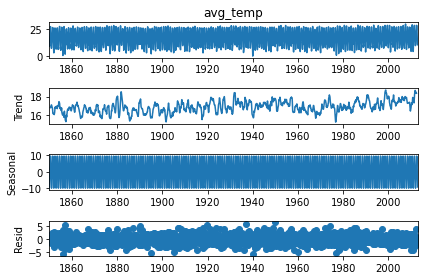

In [39]:
result.plot()


In [40]:
train.head()

,avg_temp,avg_temp_uncertainty,city,country,lat,long,land_avg_temp,land_avg_temp_uncertainty,land_max_temp,land_max_temp_uncertainty,land_min_temp,land_min_temp_uncertainty,land_ocean_avg_temp,land_ocean_avg_temp_uncertainty
date,,,,,,,,,,,,,,
1850-01-01,11.038,2.104,Columbus,United States,32.95,85.21,0.749,1.105,8.242,1.738,-3.206,2.822,12.833,0.367
1850-02-01,8.989,1.998,Columbus,United States,32.95,85.21,3.071,1.275,9.970,3.007,-2.291,1.623,13.588,0.414
1850-03-01,12.504,3.188,Columbus,United States,32.95,85.21,4.954,0.955,10.347,2.401,-1.905,1.410,14.043,0.341
1850-04-01,15.507,2.497,Columbus,United States,32.95,85.21,7.217,0.665,12.934,1.004,1.018,1.329,14.667,0.267
1850-05-01,20.107,1.667,Columbus,United States,32.95,85.21,10.004,0.617,15.655,2.406,3.811,1.347,15.507,0.249


Text(0.5, 1.0, 'Average Global Land Temp is related to the Average Temp in Columbus')

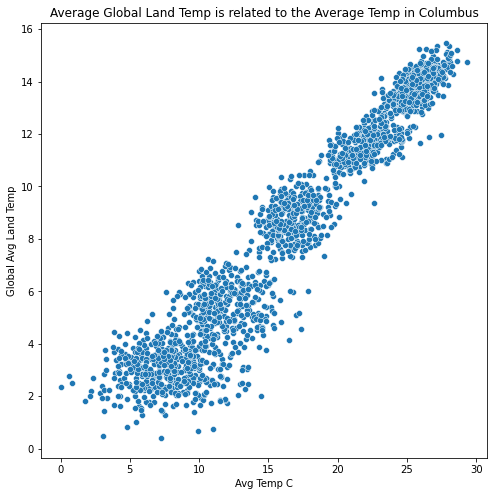

In [41]:
plt.figure(figsize=(8, 8))
sns.scatterplot(x='avg_temp', y='land_avg_temp', data=train)
plt.xlabel('Avg Temp C')
plt.ylabel('Global Avg Land Temp')
plt.title('Average Global Land Temp is related to the Average Temp in Columbus')

Null - There is no relationship between the Global Land Average Temperature and the Average Temperature in Columbus, Ohio.

Alt - There is a relationship between the Global Land Average Temperature and the Average Temperature in Columbus, Ohio.

In [42]:
corr, p = spearmanr(df['avg_temp'], df['land_avg_temp'])
print(corr, p)


0.9174023956505988 0.0


In [43]:
alpha = 0.05
Null = 'There is no relationship between the Global Land Average Temperature and the Average Temperature in Columbus, Ohio.'

Alt = 'There is a relationship between the Global Land Average Temperature and the Average Temperature in Columbus, Ohio.'

if p < alpha:
    print('We reject the null hypothesis that', Null)
    print(Alt)
else:
    print('We fail to reject the null hypothesis that', Null)

We reject the null hypothesis that There is no relationship between the Global Land Average Temperature and the Average Temperature in Columbus, Ohio.
There is a relationship between the Global Land Average Temperature and the Average Temperature in Columbus, Ohio.


Text(0.5, 1.0, 'Average Global Land and Ocean Temp is related to the Average Temp in Columbus')

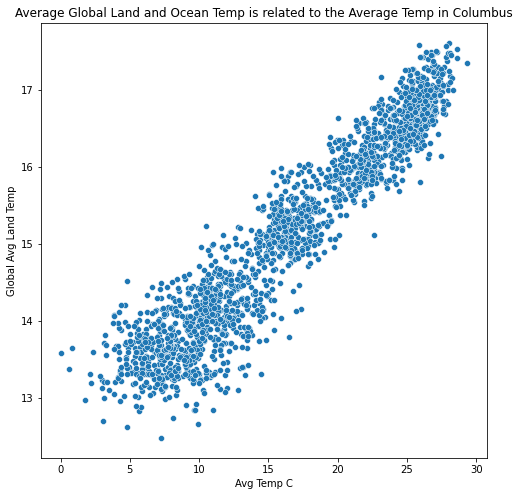

In [44]:
plt.figure(figsize=(8, 8))
sns.scatterplot(x='avg_temp', y='land_ocean_avg_temp', data=train)
plt.xlabel('Avg Temp C')
plt.ylabel('Global Avg Land Temp')
plt.title('Average Global Land and Ocean Temp is related to the Average Temp in Columbus')

Null - There is no relationship between the Global Land and Ocean Average Temperature and the Average Temperature in Columbus, Ohio.

Alt - There is a relationship between the Global Land and Ocean Average Temperature and the Average Temperature in Columbus, Ohio.


In [45]:
corr, p = spearmanr(df['avg_temp'], df['land_ocean_avg_temp'])
print(corr, p)


0.9058353635047992 0.0


In [46]:
alpha = 0.05
Null = 'There is no relationship between the Global Land and Ocean Average Temperature and the Average Temperature in Columbus, Ohio.'

Alt = 'There is a relationship between the Global Land and Ocean Average Temperature and the Average Temperature in Columbus, Ohio.'

if p < alpha:
    print('We reject the null hypothesis that', Null)
    print(Alt)
else:
    print('We fail to reject the null hypothesis that', Null)

We reject the null hypothesis that There is no relationship between the Global Land and Ocean Average Temperature and the Average Temperature in Columbus, Ohio.
There is a relationship between the Global Land and Ocean Average Temperature and the Average Temperature in Columbus, Ohio.


In [47]:
train = train.resample('Y').mean()
# create a categorical feature
train['temp_bin'] = pd.qcut(train.avg_temp, 4, labels=['cold', 'cool', 'warm', 'hot'])
train.groupby('temp_bin').mean()

,avg_temp,avg_temp_uncertainty,lat,long,land_avg_temp,land_avg_temp_uncertainty,land_max_temp,land_max_temp_uncertainty,land_min_temp,land_min_temp_uncertainty,land_ocean_avg_temp,land_ocean_avg_temp_uncertainty
temp_bin,,,,,,,,,,,,
cold,16.118297,0.610370,32.95,85.21,8.318807,0.337283,14.135868,0.589821,2.405528,0.558896,15.050982,0.150766
cool,16.694837,0.635843,32.95,85.21,8.460933,0.340626,14.212644,0.645904,2.607565,0.538065,15.134343,0.148823
warm,17.090927,0.478342,32.95,85.21,8.589050,0.252610,14.377404,0.457515,2.819854,0.398275,15.243160,0.120012
hot,17.602443,0.339287,32.95,85.21,8.837640,0.188959,14.598890,0.252311,3.052876,0.252437,15.369150,0.099122


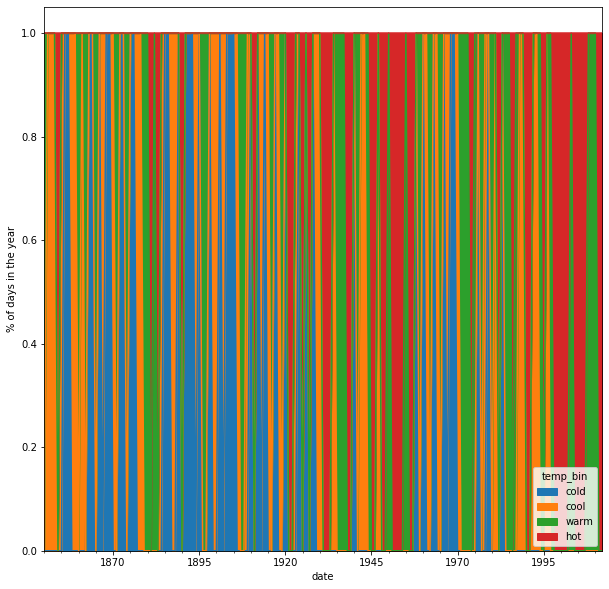

In [48]:
(train.groupby('temp_bin')
 .resample('Y')
 .size()
 .unstack(0)
 .apply(lambda row: row / row.sum(), axis=1)
 .plot.area(figsize=(10, 10))
)
plt.ylabel('% of days in the year')
plt.show()

In [49]:
# evaluation function to compute rmse
def evaluate(target_var):
    rmse = round(sqrt(mean_squared_error(validate[target_var], yhat_df[target_var])), 0)
    return rmse

# plot and evaluate 
def plot_and_eval(target_var):
    plt.figure(figsize = (12,4))
    plt.plot(train[target_var], label = 'Train', linewidth = 1)
    plt.plot(validate[target_var], label = 'Validate', linewidth = 1)
    plt.plot(yhat_df[target_var])
    plt.title(target_var)
    rmse = evaluate(target_var)
    print(target_var, '-- RMSE: {:.0f}'.format(rmse))
    plt.show()

    # Create the empty dataframe
eval_df = pd.DataFrame(columns=['model_type', 'target_var', 'rmse'])

# function to store rmse for comparison purposes
def append_eval_df(model_type, target_var):
    rmse = evaluate(target_var)
    d = {'model_type': [model_type], 'target_var': [target_var], 'rmse': [rmse]}
    d = pd.DataFrame(d)
    return eval_df.append(d, ignore_index = True)

In [50]:
train = train[['avg_temp']]
validate = validate[['avg_temp']]
test = test[['avg_temp']]

In [51]:
temp = round(train['avg_temp'][-1:][0], 2)

yhat_df = pd.DataFrame({'avg_temp': [temp]}, 
                       index = validate.index)

yhat_df.head(2)

,avg_temp
date,
1850-01-01,18.38
1850-02-01,18.38


In [52]:
for col in train.columns:
    eval_df = append_eval_df(model_type = 'last_observed_value', 
                             target_var = col)

In [53]:
eval_df

,model_type,target_var,rmse
0,last_observed_value,avg_temp,12.0


In [54]:
temp = round(train['avg_temp'].mean(), 2)


yhat_df = pd.DataFrame({'avg_temp': [temp],}, index = validate.index)

yhat_df.head(3)

,avg_temp
date,
1850-01-01,16.88
1850-02-01,16.88
1850-03-01,16.88


In [55]:
for col in train.columns:
    eval_df = append_eval_df(model_type='simple_average', 
                             target_var = col)
eval_df

,model_type,target_var,rmse
0,last_observed_value,avg_temp,12.0
1,simple_average,avg_temp,11.0


In [56]:
# compute a 30 day rolling average, 
# use the most recent/last 30 day period value to predict forward. 

period = 30

temp = round(train['avg_temp'].rolling(period).mean().iloc[-1], 2)

# yhat_df = make_predictions()

yhat_df = pd.DataFrame({'avg_temp': [temp],
                           }, index = validate.index)
yhat_df.head(2)

,avg_temp
date,
1850-01-01,17.36
1850-02-01,17.36


In [57]:
for col in train.columns:
    eval_df = append_eval_df(model_type='30d moving average', 
                             target_var = col)
eval_df

,model_type,target_var,rmse
0,last_observed_value,avg_temp,12.0
1,simple_average,avg_temp,11.0
2,30d moving average,avg_temp,11.0


In [58]:
periods = [1, 4, 12, 26, 52, 104]

for p in periods:
    temp = round(train['avg_temp'].rolling(p).mean().iloc[-1])

    yhat_df = pd.DataFrame({'avg_temp': [temp]}, index = validate.index)

    model_type = str(p) + 'd moving average'
    
    eval_df = append_eval_df(model_type = model_type,
                             target_var = 'avg_temp'
                            )

In [59]:
eval_df

,model_type,target_var,rmse
0,last_observed_value,avg_temp,12.0
1,simple_average,avg_temp,11.0
2,30d moving average,avg_temp,11.0
3,1d moving average,avg_temp,11.0
4,4d moving average,avg_temp,11.0
5,12d moving average,avg_temp,11.0
6,26d moving average,avg_temp,11.0
7,52d moving average,avg_temp,11.0
8,104d moving average,avg_temp,11.0


In [60]:
train = df[:'2010']
validate = df['2011']
test = df['2012':]
train = train[['avg_temp']]
validate = validate[['avg_temp']]
test = test[['avg_temp']]

In [61]:
train.dtypes

avg_temp    float64
dtype: object

In [62]:
yhat_df = train['2000'] + train.diff(365).mean()
pd.concat([yhat_df.head(1), validate.head(1)])

,avg_temp
date,
2000-01-01,7.20237
2011-01-01,4.86100


In [63]:
yhat_df.index = validate.index

len(yhat_df)

24

In [64]:
for col in train.columns:
    eval_df = append_eval_df(model_type = 'previous year', target_var = col)

In [65]:
eval_df


,model_type,target_var,rmse
0,last_observed_value,avg_temp,12.0
1,simple_average,avg_temp,11.0
2,30d moving average,avg_temp,11.0
3,1d moving average,avg_temp,11.0
4,4d moving average,avg_temp,11.0
5,12d moving average,avg_temp,11.0
6,26d moving average,avg_temp,11.0
7,52d moving average,avg_temp,11.0
8,104d moving average,avg_temp,11.0
9,previous year,avg_temp,3.0


In [66]:
# get the min rmse for variable

min_rmse_avg_temp = eval_df.groupby('target_var')['rmse'].min()[0]

# filter only the rows that match those rmse to find out 
# which models are best thus far
eval_df[(eval_df.rmse == min_rmse_avg_temp)]

,model_type,target_var,rmse
9,previous year,avg_temp,3.0


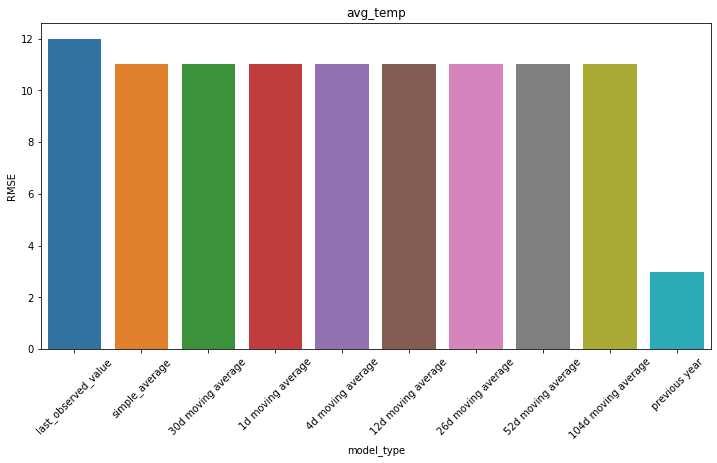

In [67]:
for col in train.columns:
    x = eval_df[eval_df.target_var == col]['model_type']
    y = eval_df[eval_df.target_var == col]['rmse']
    plt.figure(figsize=(12, 6))
    sns.barplot(x, y)
    plt.title(col)
    plt.ylabel('RMSE')
    plt.xticks(rotation=45)
    plt.show()

In [68]:
yhat_df = validate + train.diff(365).mean()
yhat_df.index = test.index

In [69]:
rmse_temp = round(sqrt(mean_squared_error(test['avg_temp'], yhat_df['avg_temp'])), 0)


In [70]:
# Plot and evaluate train, validate, and test
def plot_and_eval_test(target_var):
    plt.figure(figsize = (12,4))
    plt.plot(train[target_var], label = 'Train', linewidth = 1)
    plt.plot(validate[target_var], label = 'Validate', linewidth = 1)
    plt.plot(test[target_var], label = 'Test', linewidth = 1)
    plt.plot(yhat_df[target_var], alpha = .5, color="red")
    plt.title(target_var)
    plt.legend()
    plt.show()

rmse - avg_temp:  3.0


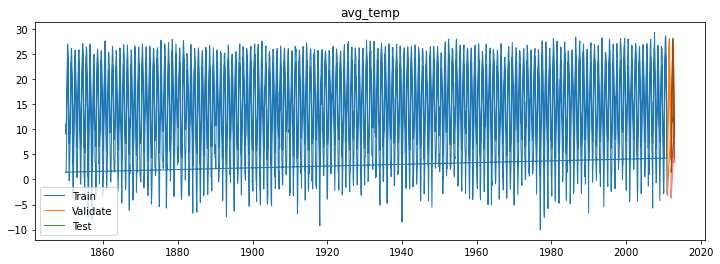

In [71]:
print("rmse - avg_temp: ", rmse_temp)
for col in train.columns:
    plot_and_eval_test(col)